## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [1]:
import os
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

In [2]:
plt.ioff() # Turn off matplotlib interactive mode to ensure plots are fully clearing from memory after saving to array. Prevents  memory leakage.

### Parameters

In [3]:
SUBSAMPLE_N = 100000

### Get paths to saved dataset files

In [4]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = os.environ.get('STEAD_DATA_DIR_PATH', 'key does not exist')

In [5]:
data_dir_path

'/Users/kaelynnrose/Documents/DATA_SCIENCE/data/STEAD'

### Data preprocessing

In [6]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path=data_dir_path, subsample_n=SUBSAMPLE_N)

Fetching data paths from directory
Parsing metadata from csv files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.44s/it]


Number of total traces: 1265657
Number of earthquake traces: 1030231
Number of noise traces: 235426
Fetching subsample of traces from hdf5 files
Parsing traces from h5py filepaths


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:29<00:00, 24.92s/it]


In [7]:
raw_signals = preproc.subsample_traces
metadata = preproc.subsample_metadata

In [8]:
# Save raw signals
signals = np.array(list(raw_signals.values()))
np.save(f'../../../data/STEAD/extracted_raw_signals_subsample_{SUBSAMPLE_N}.npy', signals)

# Save metadata
metadata.to_feather(f'../../../data/STEAD/extracted_metadata_subsample_{SUBSAMPLE_N}.feather')

In [9]:
# Create waveform images
waveform_imgs = preproc.create_waveform_images(img_width=3, img_height=2, img_dpi=100)

# Save waveform images
np.save(f'../../../data/STEAD/created_waveform_images_subsample_{SUBSAMPLE_N}.npy', waveform_imgs)

Creating waveform images from signal traces


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [31:16<00:00, 53.29it/s]


In [10]:
# Create spectrogram images
spectrogram_imgs = preproc.create_spectrogram_images(img_width=3, img_height=2, img_dpi=100)

# Save spectrogram images
np.save(f'../../../data/STEAD/created_spectrogram_images_subsample_{SUBSAMPLE_N}.npy', spectrogram_imgs)

Creating spectrogram images from signal traces


  8%|████████▌                                                                                                      | 7735/100000 [03:05<34:53, 44.07it/s]/opt/miniconda3/envs/earthquake-detection/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [39:37<00:00, 42.05it/s]


### Results

In [11]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk
trace_name,,,,,,,,,,,,,,,,,,,,,
B087.PB_20110415160922_EV,PB,B087,EH,33.495500,-116.602667,1139.0,500.0,manual,0.58,3.080000,...,CI,NaN,0.14590,16.23,96.6,[15.89999962 17.20000076 6.5 ],[[1896.]],09:23.3,earthquake_local,1
B084.PB_20070610234247_EV,PB,B084,EH,33.611570,-116.456370,1271.0,400.0,manual,0.52,17.879999,...,CI,NaN,0.97140,108.03,159.7,[27.79999924 27.39999962 29.29999924],[[2513.]],42:48.8,earthquake_local,1
AOPR.PR_20180718125903_EV,PR,AOPR,BH,18.346645,-66.753975,355.1,600.0,manual,0.19,10.900000,...,NaN,NaN,0.54550,60.55,189.0,[26.89999962 27.29999924 24.60000038],[[2966.]],59:03.1,earthquake_local,1
B084.PB_20130324214626_EV,PB,B084,HH,33.611570,-116.456370,1271.0,900.0,manual,0.63,2.430000,...,NaN,NaN,0.09953,11.07,182.0,[24.60000038 19.10000038 29.60000038],[[1534.]],46:27.9,earthquake_local,1
B086.PB_20121122004827_EV,PB,B086,EH,33.557500,-116.531000,1392.0,900.0,manual,0.62,10.240000,...,CI,NaN,0.55260,61.45,320.4,[30.60000038 16.5 21. ],[[2323.]],48:28.2,earthquake_local,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC04.C1_20180116180542_NO,C1,AC04,HH,-28.204600,-71.073900,249.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 18:05:42,noise,6
LL07.C1_20180115145229_NO,C1,LL07,HH,-42.832350,-73.477850,53.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 14:52:29,noise,6
ALN.HT_20180116182600_NO,HT,ALN,HH,40.895699,26.049700,110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 18:26:00,noise,6


In [12]:
len(raw_signals)

100000

In [13]:
# example raw signal trace
raw_signals[list(raw_signals.keys())[0]]

array([[ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
       [ 3.6461296e-04, -1.6422357e-04,  3.4679563e-04],
       [ 7.4104225e-04,  1.1546307e-03, -1.1284902e-03],
       ...,
       [ 5.0890925e-05, -2.7536237e-04, -3.4552573e-03],
       [ 8.8060588e-05,  1.7634059e-04, -6.1711483e-04],
       [ 0.0000000e+00,  0.0000000e+00, -0.0000000e+00]], dtype=float32)

In [14]:
waveform_imgs.shape

(100000, 200, 300, 3)

In [15]:
# example waveform img array
waveform_imgs[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [16]:
spectrogram_imgs.shape

(100000, 200, 300, 3)

In [17]:
# example spectrogram img array
spectrogram_imgs[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Example images created through preprocessing

In [18]:
metadata = metadata.reset_index()

In [23]:
# Get random example earthquakes
example_earthquakes = metadata[metadata['trace_category']=='earthquake_local'].sample(4)
example_earthquake_waveforms = waveform_imgs[list(example_earthquakes.index)]
example_earthquake_spectrograms = spectrogram_imgs[list(example_earthquakes.index)]

# Get random example noise
example_noise = metadata[metadata['trace_category']=='noise'].sample(4)
example_noise_waveforms = waveform_imgs[list(example_noise.index)]
example_noise_spectrograms = spectrogram_imgs[list(example_noise.index)]

In [24]:
example_earthquakes

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk
37784,HOOD.UW_20130312010845_EV,UW,HOOD,BH,45.322260,-121.650930,1512.0,700.0,manual,0.89,...,NaN,NaN,0.03831,4.26,203.0,[6. 9.89999962 4.9000001 ],[[1732.]],2013-03-12 01:08:46.090000,earthquake_local,3
30030,MOD.BK_20160211064016_EV,BK,MOD,HH,41.902460,-120.302950,1554.5,700.0,manual,0.95,...,NN,NaN,0.50200,55.99,94.0,[28.89999962 31.5 26.39999962],[[2376.]],2016-02-11 06:40:17.596050,earthquake_local,2
2705,B082.PB_20110917031249_EV,PB,B082,EH,33.598182,-116.596005,1374.8,700.0,manual,0.57,...,CI,NaN,0.87610,97.43,5.2,[33.79999924 34.59999847 31.10000038],[[2754.]],9/17/11 3:12,earthquake_local,1
42718,GDXB.NC_20131226123432_EV,NC,GDXB,HH,38.807968,-122.795303,939.0,498.0,autopicker,0.93,...,NC,NaN,0.02342,2.60,246.0,[23.5 16.60000038 22.60000038],[[1223.]],2013-12-26 12:34:33.400000,earthquake_local,3


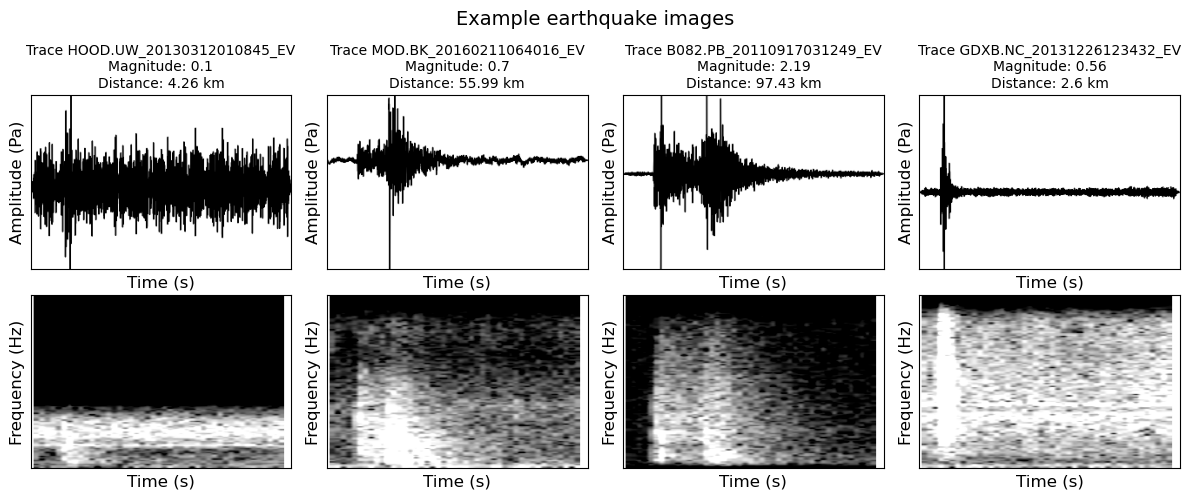

In [31]:
# Plot example earthquakes - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_earthquake_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_earthquakes.iloc[i]['trace_name']
        mag = example_earthquakes.iloc[i]['source_magnitude']
        dist = example_earthquakes.iloc[i]['source_distance_km']
        ax.set_title(f'Trace {trace_name}\nMagnitude: {mag}\nDistance: {dist} km', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.imshow(example_earthquake_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
        ax.set_xticks([])
        ax.set_yticks([])
    count += 1
plt.suptitle(f'Example earthquake images',fontsize=14)
plt.tight_layout()
plt.show()

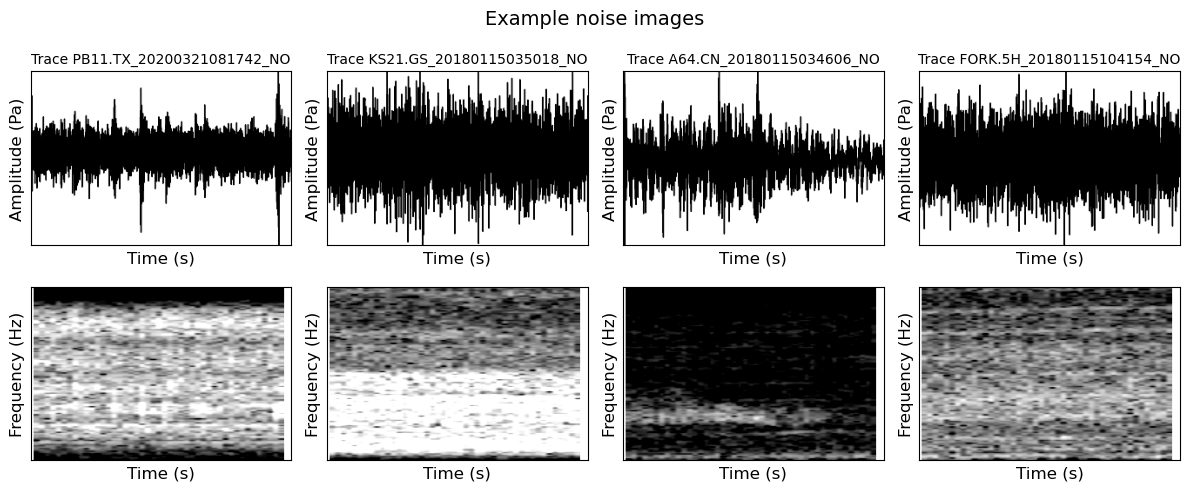

In [32]:
# Plot example noise - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_noise_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_noise.iloc[i]['trace_name']
        ax.set_title(f'Trace {trace_name}', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.imshow(example_noise_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
        ax.set_xticks([])
        ax.set_yticks([])
    count += 1
plt.suptitle(f'Example noise images',fontsize=14)
plt.tight_layout()
plt.show()